<a href="https://colab.research.google.com/github/xscbsx/udacity-data-scientist-nanodegree/blob/main/Article_Data_Scientist_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)
In this project, we analysed the data of more than 200 data scientist job positions extracted from during the period of xxx, with features such as:

*   Salary Estimate
*   Location
*   Company Rating
*   Job Description
*   and more


# Questions


1.   Which companies have the most number of data scientist positions?
2.   What's the most frequent salary estimate?
3.   Which cities offer more job opportunities?






In [4]:
#Importing libraries 
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
#uploading the file
from google.colab import files
uploaded = files.upload()

Saving DataScientist.csv to DataScientist.csv


In [7]:
dataframe= pd.read_csv('DataScientist.csv')

In [4]:
# check the data frame info
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [55]:
#checking the shape of dataframe 
dataframe.shape 

(3909, 17)

In [ ]:
#checking the data types 
dataframe.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [ ]:
#checking the colummns
dataframe.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [5]:
#Checking the first 3 rows of the dataset 
dataframe.head(3)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True


In [58]:
#Checking if there is any null numbers 
dataframe.isna().sum()

Unnamed: 0           0
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [60]:
#Adjusting the format of data of the Salary Estimate colummn ( Before:$37K-$66K (Glassdoor est.) After: $37K-$66K)
dataframe['Salary Estimate'] = dataframe['Salary Estimate'].str[:9]
dataframe['Salary Estimate']

0       $111K-$18
1       $111K-$18
2       $111K-$18
3       $111K-$18
4       $111K-$18
          ...    
3904    $55K-$112
3905    $55K-$112
3906    $55K-$112
3907    $55K-$112
3908    $55K-$112
Name: Salary Estimate, Length: 3909, dtype: object

In [7]:
#Unique values of salary range 
unique_salaries=dataframe['Salary Estimate'].unique()

unique_salaries

array(['$111K-$18', '$120K-$14', '$119K-$14', '$74K-$124', '$102K-$12',
       '$129K-$21', '$156K-$25', '$116K-$15', '$133K-$17', '$110K-$13',
       '$82K-$141', '$96K-$119', '$146K-$17', '$102K-$16', '$113K-$18',
       '$76K-$122', '$134K-$21', '$76K-$125', '$132K-$20', '$83K-$105',
       '$75K-$143', '$34K-$72K', '$37K-$75K', '$136K-$16', '$34-$53 P',
       '$46K-$80K', '$79K-$130', '$91K-$105', '$31K-$56K', '$39K-$81K',
       '$99K-$174', '$76K-$147', '$62K-$109', '$70K-$123', '$40K-$73K',
       '$38K-$59K', '$60K-$105', '$69K-$144', '$47K-$82K', '$90K-$175',
       '$39K-$87K', '$36K-$71K', '$55K-$117', '$114K-$14', '$138K-$21',
       '$72K-$97K', '$73K-$136', '$10-$26 P', '$94K-$151', '$97K-$159',
       '$46K-$104', '$45K-$81K', '$92K-$144', '$64K-$97K', '$47K-$73K',
       '$84K-$156', '$97K-$111', '$84K-$101', '$99K-$173', '$93K-$151',
       '$50K-$87K', '$71K-$117', '$44K-$80K', '$94K-$166', '$65K-$100',
       '$41K-$74K', '$46K-$83K', '$45K-$106', '$71K-$122', '$143

# What's the most common salary?
According to the data, most of jobs have the salary estimate of $113K-$18.

In [8]:
#Checking the to 10 most usual salaries 
top_10_salaries=dataframe['Salary Estimate'].value_counts().head(10)
top_10_salaries

$113K-$18    90
$93K-$151    62
$71K-$122    60
$111K-$17    60
$114K-$14    60
$134K-$21    60
$119K-$14    44
$100K-$17    37
$97K-$159    32
$98K-$152    31
Name: Salary Estimate, dtype: int64

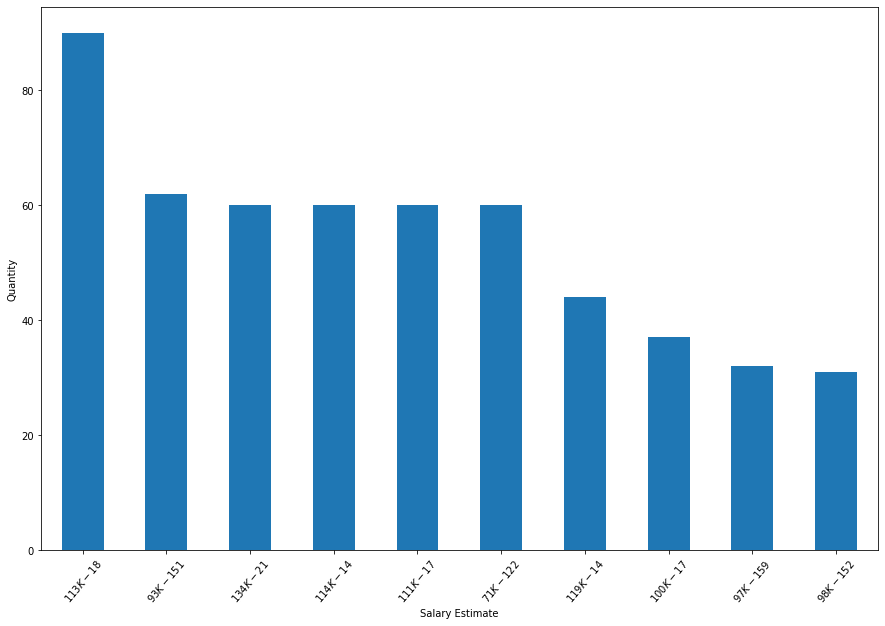

In [20]:
#Creating a bar plot using the Salary Estimate 
plt.figure(figsize=(15,10))
top_10_salaries.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Salary Estimate")
plt.ylabel("Quantity")
plt.show()

In [64]:
#Checking the to 10 most usual salaries 
top_5_industry=dataframe['Sector'].value_counts().head(5)
top_5_industry

Information Technology       1124
Business Services             679
-1                            546
Biotech & Pharmaceuticals     293
Finance                       270
Name: Sector, dtype: int64

# Which companies have the most number of jobs opportunities?

As you can see on the graph bellow, the top 5 companies are: Apple,IBM,  Amazon, Staffigo Technical Services and Facebook

In [19]:
#Checking the top 5 companies 
top_5_company=dataframe['Company Name'].value_counts().head(5)
top_5_company

Apple\n4.1                               60
IBM\n3.7                                 57
Amazon\n3.9                              47
Staffigo Technical Services, LLC\n5.0    28
Diverse Lynx\n3.9                        25
Name: Company Name, dtype: int64

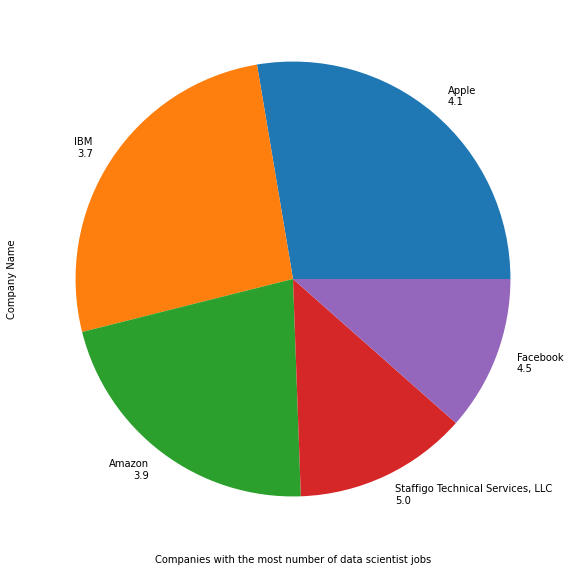

In [32]:
#Creating a pie plot using the Company Name 
plt.figure(figsize=(15,10))
top_5_company.sort_values(ascending=False).plot.pie()
plt.xticks(rotation=50)
plt.xlabel("Companies with the most number of data scientist jobs")
plt.show()

# Where is the best place to find a data scientist job?

In [53]:
#Checking the cities 
dataframe['Headquarters'].unique()

array(['Montreal, Canada', 'New York, NY', 'Lyndhurst, NJ',
       'Hartford, CT', 'Stamford, CT', 'Brooklyn, NY',
       'London, United Kingdom', 'Burbank, CA', 'Chicago, IL',
       'Jacksonville, FL', 'Stockholm, Sweden', 'San Francisco, CA',
       'Memphis, TN', 'Warren, MI', 'Berlin, Germany', 'Menlo Park, CA',
       'Marina del Rey, CA', 'Washington, DC', '-1', 'San Jose, CA',
       'Seattle, WA', 'Reading, MA', 'Iselin, NJ', 'Norwalk, CT',
       'Tehran, Iran', 'Jersey City, NJ', 'Greenwich, CT',
       'Mountain View, CA', 'Langley, VA', 'Princeton, NJ', 'Wichita, KS',
       'East Northport, NY', 'South Plainfield, NJ', 'Medford, OR',
       'Bengaluru, India', 'North Brunswick, NJ', 'Baltimore, MD',
       'Plainsboro, NJ', 'Newark, NJ', 'San Diego, CA', 'Mc Lean, VA',
       'New York, NY (US), NY', 'Santa Monica, CA', 'San Antonio, TX',
       'Coconut Creek, FL', 'Port Washington, NY', 'MINATO-KU, Japan',
       'Carle Place, NY', 'Rockville Centre, NY', 'Piscataway, 

In [54]:
#Checking the top 10 best cities to find a data scientist job
top_10_cities=dataframe['Headquarters'].value_counts().head(10)
top_10_cities

New York, NY        297
-1                  240
San Diego, CA       179
Chicago, IL         158
Austin, TX          106
Los Angeles, CA      87
Houston, TX          83
San Antonio, TX      77
Philadelphia, PA     67
Armonk, NY           62
Name: Headquarters, dtype: int64

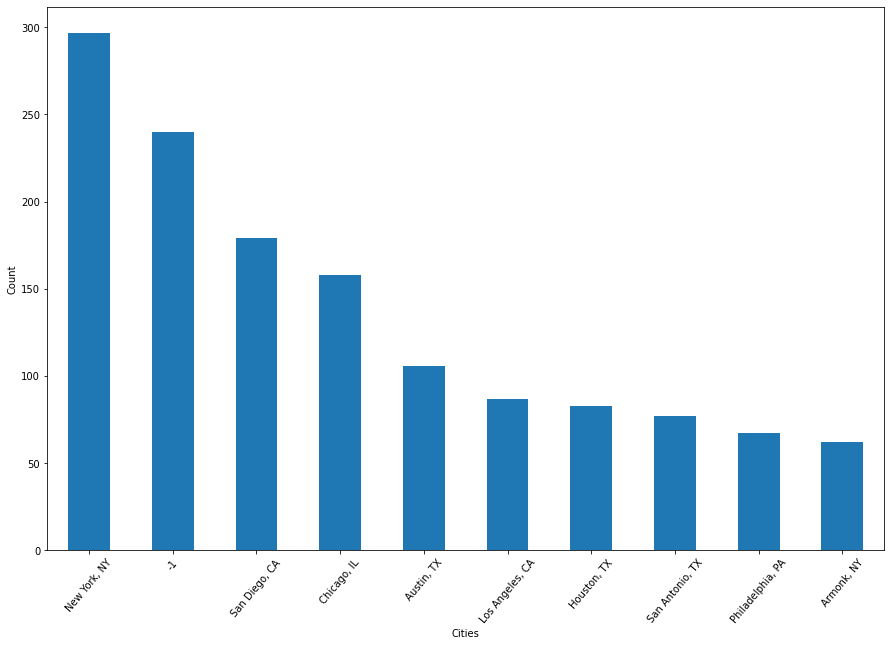

In [32]:
plt.figure(figsize=(15,10))
top_10_cities.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()

# Word cloud of the job descriptions 

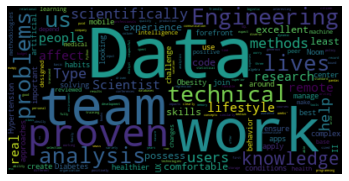

In [47]:
# Start with one review:
texts = dataframe['Job Description'][1]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(texts)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
for text in texts:
  plt.show()